In [1]:
from sklearn import datasets, manifold
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples

# K-Silhouette
* It labels the data based on the points with the maximum silhouette score in the cluster.
* All points are assigned a random integer label $k \in \{1, ..., K\}$, forming a partition of the dataset.
* The point with the highest silhouette score per cluster is extracted and used as a cluster representative.
* All the points in the dataset, then, are assigned a label ($k$) according to their closest representative.
* Note that the number of clusters ($K$) can decrease during training, because a cluster can disappeared. 

In [2]:
from models import ksil

# Experiments: Digits
* The [handwritten digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits) dataset.
* 5,620 images, each with 64 features (multivariate), and one label (the depicted integer).

In [3]:
# dataset loading (digits)
digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape

Max patience is reached at K=4, using the solution with score 0.13


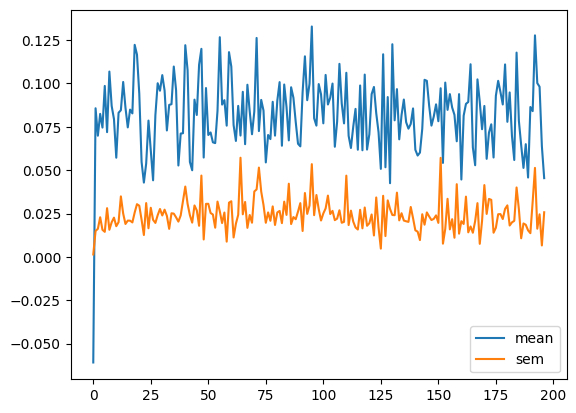

In [6]:
centres, clustering, history = ksil(points=X, k=50, patience=100)
history.plot();

# The Silhouette Coefficient: Aggregated
* Micro-averaged: the default, noise and imbalance sensitive
* Macro-averaged: new, bypassing the issues above

In [8]:
import sil
print(f'Micro-Sil: {sil.micro(X, clustering):.2f}')
print(f'Macro-Sil: {sil.macro(X, clustering):.2f}')

Micro-Sil: 0.08
Macro-Sil: 0.08


# The Baseline
* K-Means

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X)
print(f'Micro-Sil: {sil.micro(X, kmeans.labels_):.2f}')
print(f'Macro-Sil: {sil.macro(X, kmeans.labels_):.2f}')

Micro-Sil: 0.18
Macro-Sil: 0.19
